In [1]:
import sys
sys.path.append("../")
import os
import seaborn as sns
import matplotlib.pyplot as plt

from src.util import get_data, get_langs

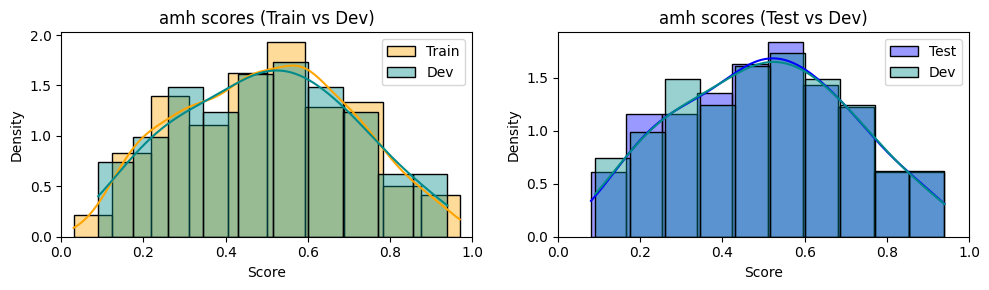

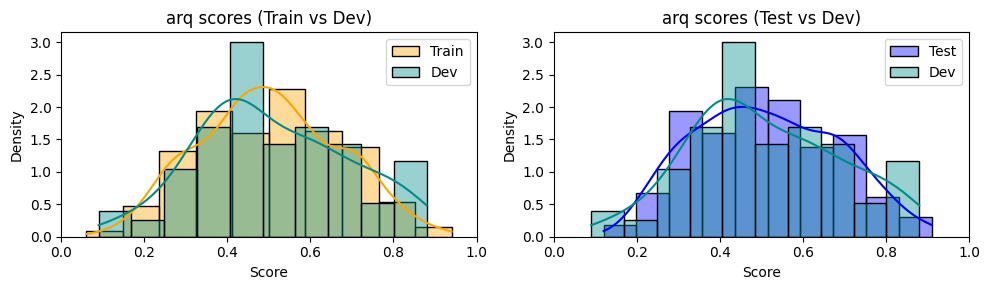

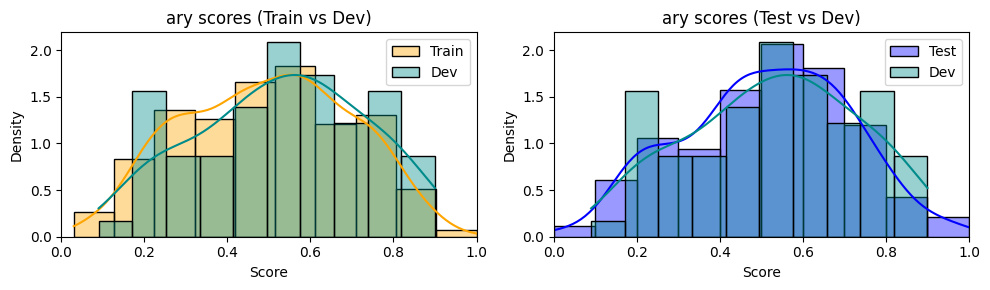

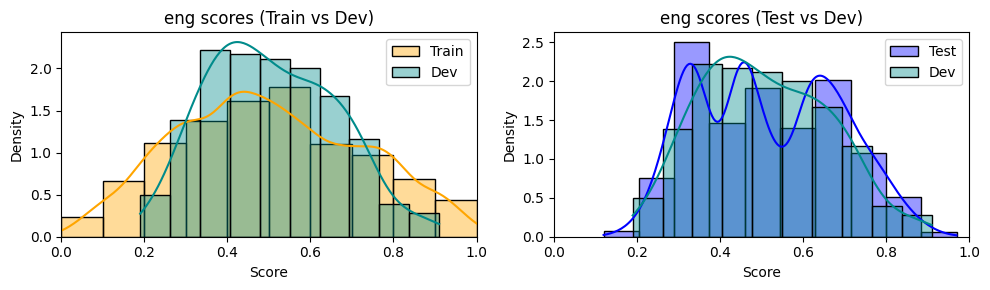

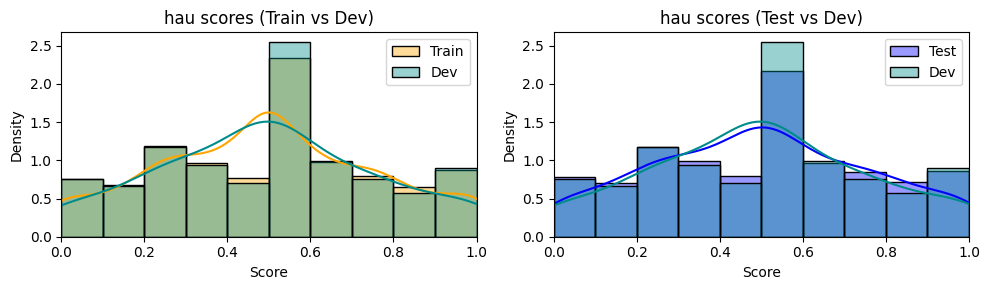

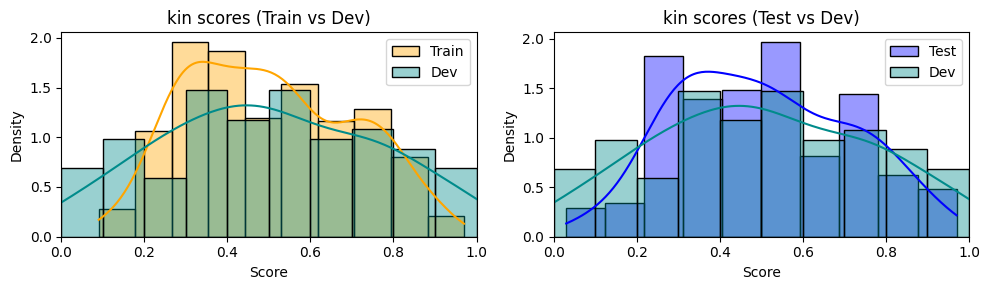

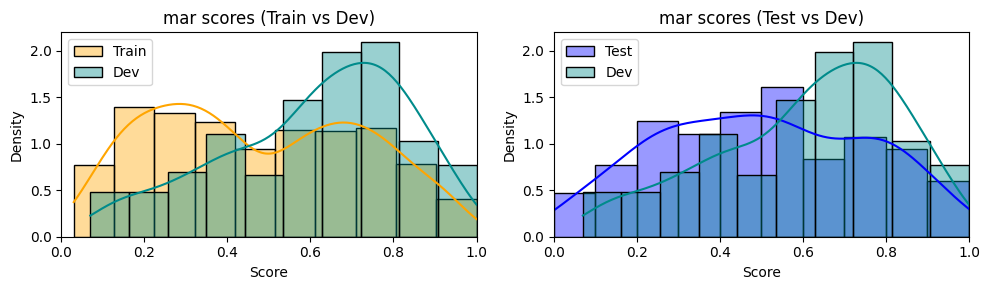

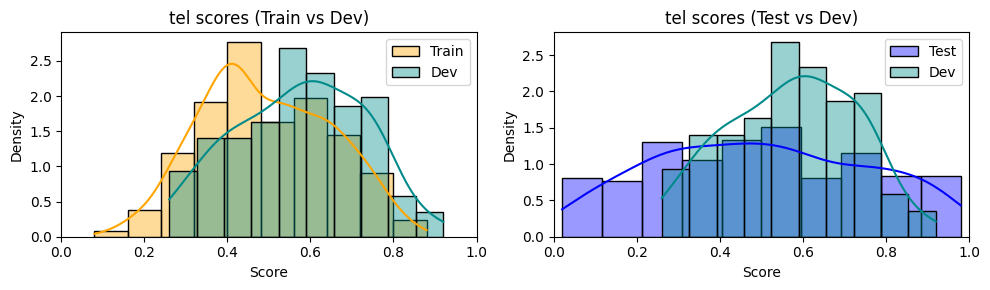

In [3]:
def histplot(data, ax, title, color, alpha, bins):
    sns.histplot(
        data,
        color=color,
        kde=True,
        alpha=alpha,
        label=title,
        ax=ax,
        stat="density",
        bins=bins,
    )

def plot(lang, train, dev, test=None, save=False):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))  # Create two subplots side by side
    title = f"{lang} scores"
    bins = 10
    alpha = 0.4
    # Left plot: Train vs Dev
    histplot(train["Score"], axs[0], "Train", "orange", alpha, bins)
    histplot(dev["Score"], axs[0], "Dev", "darkCyan", alpha, bins)
    axs[0].set_title(title + " (Train vs Dev)")
    axs[0].set_xlim(0, 1)
    axs[0].legend()
    # Right plot: Test vs Dev
    if test is not None:
        histplot(test["Score"], axs[1], "Test", "blue", alpha, bins)
        histplot(dev["Score"], axs[1], "Dev", "darkCyan", alpha, bins)
        axs[1].set_title(title + " (Test vs Dev)")
        axs[1].set_xlim(0, 1)
        axs[1].legend()

    plt.tight_layout()
    plt.show()

to_save = ["arq", "eng", "tel", "hau"]
os.makedirs("FIGURES", exist_ok=True)

for lang in get_langs():
    if lang == "esp":
        continue
    train = get_data(lang, train=True)
    dev = get_data(lang, train=False)
    test = get_data(lang, test=True)
    plot(lang, train, dev, test, save=lang in to_save)

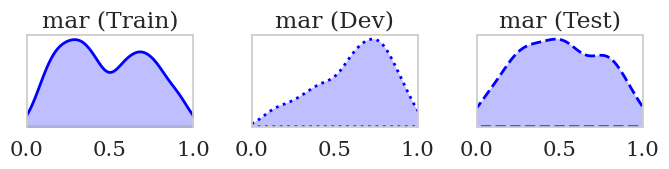

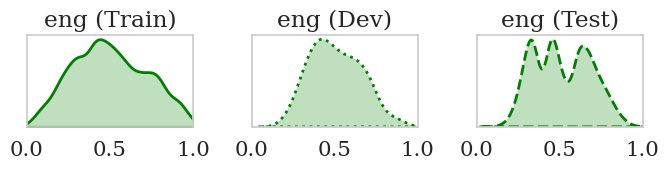

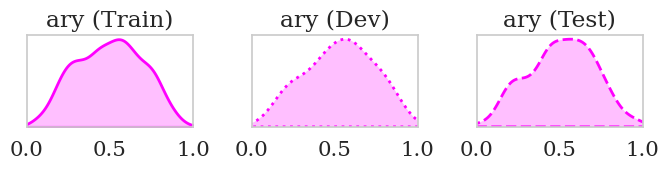

In [5]:
langs = "mar tel eng ary".split()  # most interesting distributions
langs = "mar eng ary".split()  # most interesting distributions
colors = ["blue", "green", "magenta", "red",  "yellow"]

sns.set_theme(style="whitegrid")
def plot(train, dev, test, axs, title, color):
    # set whitegrid
    sns.kdeplot(train["Score"], ax=axs[0], label="Train", fill=True, color=color, linewidth=2)
    sns.kdeplot(dev["Score"], ax=axs[1], label="Dev", fill=True, color=color, linestyle="dotted", linewidth=2)
    if test is not None:
        sns.kdeplot(test["Score"], ax=axs[2], label="Test", fill=True, color=color, linestyle="dashed", linewidth=2)
    for ax in axs:
        ax.set_xlim(0, 1)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_yticklabels([])
        ax.yaxis.set_ticks_position("none")
        ax.set_xticks([0, 0.5, 1])
    axs[0].set_title(title + " (Train)")
    axs[1].set_title(title + " (Dev)")
    axs[2].set_title(title + " (Test)")


sns.set_theme(font="Serif", style="whitegrid", font_scale=1.4)
sns.set_palette(sns.color_palette(colors))

for i, lang in enumerate(langs):
    if lang == "esp":
        continue
    train = get_data(lang, train=True)
    dev = get_data(lang, train=False)
    test = get_data(lang, test=True)
    
    fig, axs = plt.subplots(1, 3, figsize=(7, 2))  # create a new figure with subplots for each language
    plot(train, dev, test, axs, lang, colors[i % len(colors)])

    for ax in axs:
        ax.grid(False)
    
    plt.tight_layout()
    plt.savefig(f"FIGURES/{lang}_distributions.pdf", bbox_inches="tight")
    plt.show()